<a href="https://colab.research.google.com/github/kaboyo/Machine-learning/blob/main/Amilioride_MOA_copy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧬 Introduction**

## **Background and Overview**
Multiple myeloma (MM) is a hematologic malignancy characterized by the uncontrolled proliferation of plasma cells in the bone marrow. This disease is associated with a variety of complications, including bone destruction, anemia, kidney dysfunction, and immune suppression. Despite advancements in treatment options, such as proteasome inhibitors, immunomodulatory drugs, and monoclonal antibodies, multiple myeloma remains largely incurable, and resistance to therapy often develops over time. As a result, there is a continued need for novel therapeutic approaches to improve patient outcomes.

Amiloride is a potassium-sparing diuretic commonly used to treat conditions like hypertension and heart failure. It works by inhibiting the epithelial sodium channel (ENaC) in the kidneys, preventing sodium reabsorption and promoting potassium retention. Interestingly, multiple studies [LINK] have suggested that amiloride may have potential as a cancer therapeutic, including in multiple myeloma. It is believed that amiloride exerts its antitumor effects by targeting multiple cellular pathways involved in tumor progression, including ion channel regulation, apoptosis, and cell migration. Additionally, amiloride has shown synergistic effects when combined with other chemotherapeutic agents, such as dexamethasone and melphalan, in preclinical models.

Given amiloride’s promising effects in preclinical studies and its established safety profile, there is growing interest in investigating its potential as a therapeutic agent for multiple myeloma. Thus, the purpose of this project is to explore Amiliorides mechanisms of action at the molecular level to determine how it can be effectively integrated into existing treatment regimens.

By leveraging various bioinformatics approaches, including weighted gene co-expression network analysis (WGCNA), differential expression analysis, protein-protein interaction (PPI) network analysis, and functional enrichment analysis, this project will provide a comprehensive view of how amiloride impacts cellular processes at different levels of biological organization. The results of this project will enhance our understanding of amiloride’s therapeutic potential and guide future research on its use in the treatment of multiple myeloma.

This repository is structured into four main sections:
- Introduction: Provides an overview of the project, scientific background, the data sources used in this project, and the analyses employed.
- Project Staging: Details project dependencies, data loading and preperation, exploratory data analysis (EDA), quality control, filtering, and normalization steps.
- Analyses: Includes weighted gene co-expression network analysis, differential expression analysis, protein-protein interaction network analysis, and functional enrichment analysis. Summarizations of the results for each analysis are also provided here.
- Results and Discussion: Synthesizes the results from all analyses and discusses their broader biological context and implications.

## **Data Sources and Analyses**
The data for this project is derived from the study titled "Amiloride, An Old Diuretic Drug, Is a Potential Therapeutic Agent for Multiple Myeloma," which is publicly available through the Gene Expression Omnibus (GEO) under accession number GSE95077. This study explores the effects of amiloride on multiple myeloma cell lines and a xenograft mouse model, providing valuable insights into the drug's potential as a therapeutic agent.

The bulk RNA-sequencing data for the JJNE cell lines (established from the bone marrow of a 57-year-old woman with plasma cell leukemia) used in this project are accessible through the following sample accession numbers: GSM2495770, GSM2495771, GSM2495772, GSM2495767, GSM2495768, GSM2495769.

In this study, amiloride’s impact was assessed in multiple myeloma cell lines, alongside a xenograft mouse model, where human tumor cells were implanted into immunocompromised mice. The research aimed to evaluate the drug’s toxicity, specifically its ability to induce cell death (apoptosis) in tumor cells. Additionally, the study sought to understand the underlying mechanisms through a combination of RNA sequencing, quantitative PCR (qRT-PCR), immunoblotting, and immunofluorescence assays.

The investigators observed that amiloride treatment led to apoptosis in a broad panel of multiple myeloma cell lines and in the xenograft mouse model. Furthermore, they discovered that amiloride exhibited a synergistic effect when combined with other chemotherapeutic agents, including dexamethasone and melphalan. These findings suggest that amiloride could enhance the efficacy of existing treatments, potentially improving therapeutic outcomes for multiple myeloma patients.

For this project, I will analyze the RNA-sequencing data from this study to gain deeper insights into amiloride’s mechanisms of action. Specifically, the following analyses will be performed:

- Weighted Gene Co-Expression Network Analysis (WGCNA): WGCNA will be used to identify coordinated patterns of gene expression across both the treatment and control groups. This analysis will help uncover underlying biological processes and regulatory networks that control gene expression. WGCNA is particularly useful for identifying upstream regulatory factors that may influence the expression of multiple genes, and it provides a global view of transcriptional organization, revealing how genes with similar expression profiles are grouped together, often reflecting shared functions or regulatory mechanisms.

- Differential Expression Analysis: This analysis will focus on identifying genes that show significant changes in expression between the treatment (amiloride) and control groups. Differential expression analysis will highlight genes that are directly affected by the drug, identifying those that are upregulated or downregulated as a result of amiloride treatment. By isolating these changes, we can pinpoint the most biologically relevant genes that may play key roles in amiloride’s effects on multiple myeloma cells.

- Protein-Protein Interaction (PPI) Network Analysis: Building on the results of the differential expression analysis, PPI network analysis will shift the focus to the interactions between the proteins encoded by the differentially expressed genes. This analysis will help us understand how amiloride’s effects may be mediated at the protein level, revealing how these proteins interact with each other to form complexes that drive cellular processes. By mapping out these interactions, we can connect the gene expression changes to functional outcomes and identify critical protein networks that are altered by amiloride.

- Functional Enrichment Analysis: To provide a broader biological context for the differentially expressed genes and proteins, functional enrichment analysis will categorize them into known biological functions and pathways. Gene Ontology (GO) analysis will assign genes to specific functional terms, such as biological processes, molecular functions, and cellular components. Additionally, pathway analysis (e.g., KEGG or Reactome) will map genes to known signaling and metabolic pathways. This step will abstract the results from the gene and protein levels to a higher-level understanding of the biological processes and molecular pathways that are impacted by amiloride treatment, linking gene expression changes and protein interactions to functional consequences within the cell.

By performing these analyses, we will examine amiloride’s effects at multiple levels of biological organization—from gene expression changes to protein interactions and functional pathway alterations—allowing us to gain a comprehensive understanding of its mechanisms of action in multiple myeloma.

# **🧬 Project Staging**

This section is broken into three sub-sections:

- Project Dependencies: Import the necessary libraries for downstream analyses.
- Load, Inspect, and Prepare Data: Steps to load raw datasets, inspect data structure, and prepare it for downstream processing.
- Quality Control, Filtering, and Normalization: Applying quality control measures and data transformations to generate high-quality, reliable data for down stream analysis.

## **Project Dependencies**

To start, we'll import the following Python libraries, which will be used in various steps of the analysis. Ensure that these libraries are installed in your Python environment before proceeding.

In [ ]:
#very important for working on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mygene
!pip install gseapy
!pip install networkx

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import mygene
import gseapy as gp
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import mannwhitneyu
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
from scipy.integrate import solve_ivp
import os
import subprocess
import gzip
import requests #v2.32.3
import networkx as nx #v3.4.2
from io import StringIO

## **Load, Inspect, and Prepare Data**

Next, we'll retrieve our RNA-sequencing data for the control and treatment JJN3 cells lines:


In [ ]:
def download_and_load_data(url, output_filename, sep="\t", column_filter=None):
    # Step 1: Download the file using wget
    print(f"Downloading {output_filename} from {url}...")
    subprocess.run(["wget", "-O", output_filename + ".gz", url], check=True)

    # Step 2: Gunzip the file
    print(f"Unzipping {output_filename}.gz...")
    with gzip.open(output_filename + ".gz", "rb") as gz_file:
        with open(output_filename, "wb") as out_file:
            out_file.write(gz_file.read())

    # Step 3: Load the data into a pandas DataFrame
    print(f"Loading {output_filename} into a pandas DataFrame...")
    df = pd.read_csv(output_filename, sep=sep, index_col=0)

    # Optional: Filter columns based on the keyword
    if column_filter:
        print(f"Filtering columns with keyword '{column_filter}'...")
        filtered_columns = [col for col in df.columns if column_filter in col]
        df = df[filtered_columns]

    return df

# Load data
#Consider the 5FKMS12BM cell line
url = 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE95077&format=file&file=GSE95077%5FNormalized%5FCount%5FMatrix%5FKMS12BM%5FAmiloride%5Fand%5FCTRL%2Etxt%2Egz'
output_filename = "GSE95077_Normalized_Count_Matrix_KMS12BM_Amiloride_and_CTRL.txt.gzt"
column_keyword = "" #no keyword needed
countlist = download_and_load_data(url, output_filename, column_filter=column_keyword)

# View first 5 rows of data
countlist.head()

Unzipping GSE95077_Normalized_Count_Matrix_KMS12BM_Amiloride_and_CTRL.txt.gzt.gz...
Loading GSE95077_Normalized_Count_Matrix_KMS12BM_Amiloride_and_CTRL.txt.gzt into a pandas DataFrame...


,BM_AMIL_141053_INTER-STR_counts,BM_AMIL_141059_INTER-STR_counts,BM_AMIL_141065_INTER-STR_counts,BM_CTRL_141051_INTER-STR_counts,BM_CTRL_141057_INTER-STR_counts,BM_CTRL_141063_INTER-STR_counts
ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000005,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,2270.0,4190.0,2720.0,2090.0,1670.0,1780.0
ENSG00000000457,599.0,510.0,559.0,579.0,572.0,641.0
ENSG00000000460,901.0,1090.0,1110.0,919.0,895.0,961.0


The data frame above is indexed by Ensemble gene ID (ENSG), and then there are six columns of RNA-sequencing expression data (i.e., counts). The first three columns contain expression counts for the experimental group (i.e., the amiloride treatment group), and the last three columns contain expression counts for the control group.

Before performing downstream analyses we'll want to convert the Ensemble gene IDs to gene names, as demonstrated in next code block.




In [ ]:
# create MyGeneInfo object
mg = mygene.MyGeneInfo()

# get the ensembl id from index
ensembl_ids = countlist.index.tolist()

# query the gene symbols for the ensemble ids and onvert result to dataframe
gene_info = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='human')
gene_df = pd.DataFrame(gene_info)

# remove duplicate ensemble ids and rows where symbol is missing or duplicated
gene_df = gene_df.dropna(subset=['symbol']).drop_duplicates(subset='query')

# map gene symbols back to original dataframe and move gene_name column to front column
countlist['Gene_Name'] = countlist.index.map(gene_df.set_index('query')['symbol'])
cols = ['Gene_Name'] + [col for col in countlist.columns if col != 'Gene_Name']
countlist = countlist[cols]

countlist.head()

INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 2100

,Gene_Name,BM_AMIL_141053_INTER-STR_counts,BM_AMIL_141059_INTER-STR_counts,BM_AMIL_141065_INTER-STR_counts,BM_CTRL_141051_INTER-STR_counts,BM_CTRL_141057_INTER-STR_counts,BM_CTRL_141063_INTER-STR_counts
ENSG00000000003,TSPAN6,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000005,TNMD,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,DPM1,2270.0,4190.0,2720.0,2090.0,1670.0,1780.0
ENSG00000000457,SCYL3,599.0,510.0,559.0,579.0,572.0,641.0
ENSG00000000460,FIRRM,901.0,1090.0,1110.0,919.0,895.0,961.0


Next, we'll check for missing data and perform basic data exploration to understand the distribution and variability of RNA sequencing counts across the samples before performing any downstream analysis. First, let's check for missing value:



In [ ]:
# check for missing values
print(countlist.isnull().sum())

Gene_Name                          16208
BM_AMIL_141053_INTER-STR_counts        0
BM_AMIL_141059_INTER-STR_counts        0
BM_AMIL_141065_INTER-STR_counts        0
BM_CTRL_141051_INTER-STR_counts        0
BM_CTRL_141057_INTER-STR_counts        0
BM_CTRL_141063_INTER-STR_counts        0
dtype: int64


Notably, the dataset has no null (missing) values. Next, we'll explore the distribution and variability in our dataset, as demonstrated in the code block below:



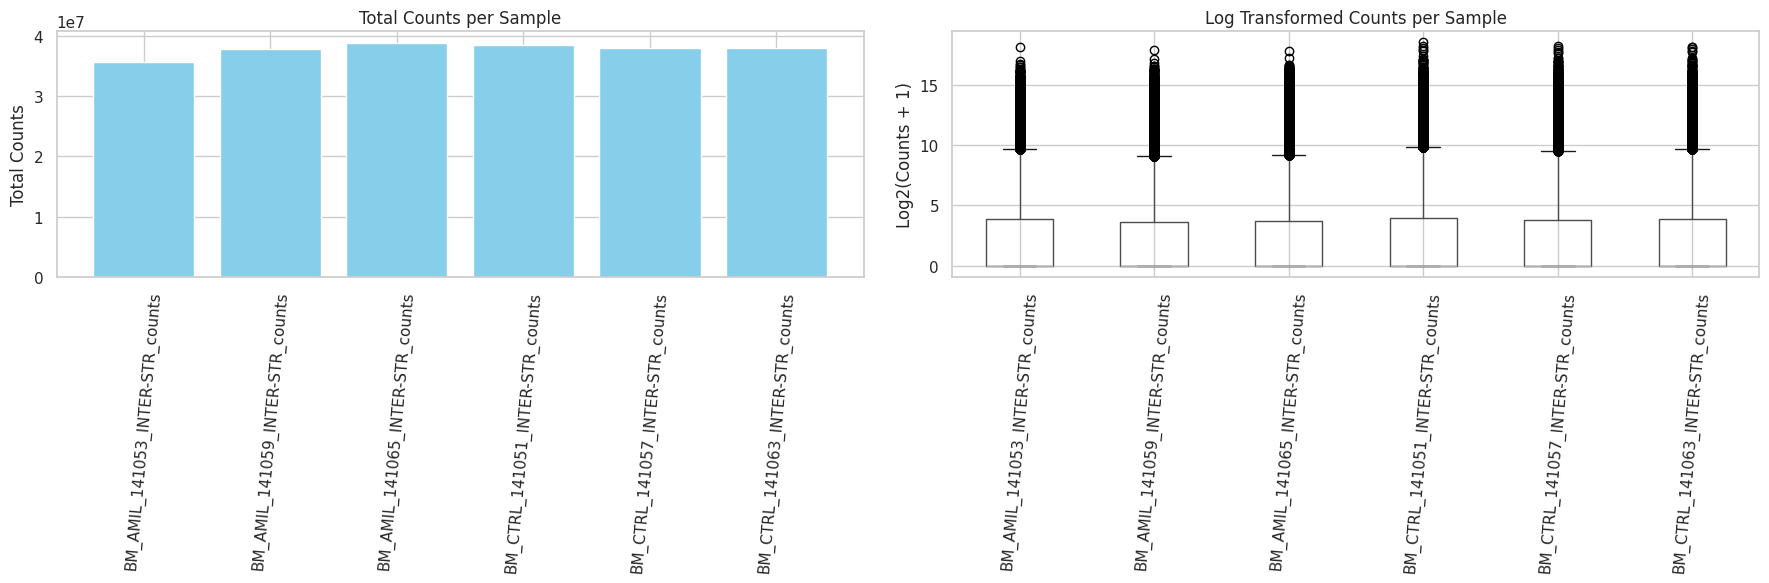

In [ ]:
# Drop the Gene Name column from countlist for counting
countlist_no_name = countlist.iloc[:, 1:]

# Calculate total counts per sample and log transform counts
total_counts = countlist_no_name.sum(axis=0)
log_counts = countlist_no_name.apply(lambda x: np.log2(x + 1))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot total counts per sample
axes[0].bar(countlist_no_name.columns, total_counts, color='skyblue')  # Use countlist_no_name columns here
axes[0].set_ylabel('Total Counts')
axes[0].set_title('Total Counts per Sample')
axes[0].tick_params(axis='x', rotation=85)

# Plot log transformed counts per sample
log_counts.boxplot(ax=axes[1])
axes[1].set_ylabel('Log2(Counts + 1)')
axes[1].set_title('Log Transformed Counts per Sample')
axes[1].tick_params(axis='x', rotation=85)

plt.tight_layout()
plt.show()

The chart on the left, titled "Total Counts Per Sample," helps visualize the overall sequencing depth across the samples. Ideally, the bars, representing the total counts, should be of similar height, indicating that sequencing depth is consistent across samples, which is the case with this data set.

Conversely, the rightmost chart is used to assess the variability and distribution of gene expression counts across samples. In this case, we can see that the boxes, representing the interquartile range, and the whiskers, representing variability outside the upper and lower quartiles, are of similar sizes across the samples, indicating a consistent data distribution.

Now, before moving on to quality control and filtering, we'll use one last visualization to explore the similarity, or dissimilarity, between our six samples:

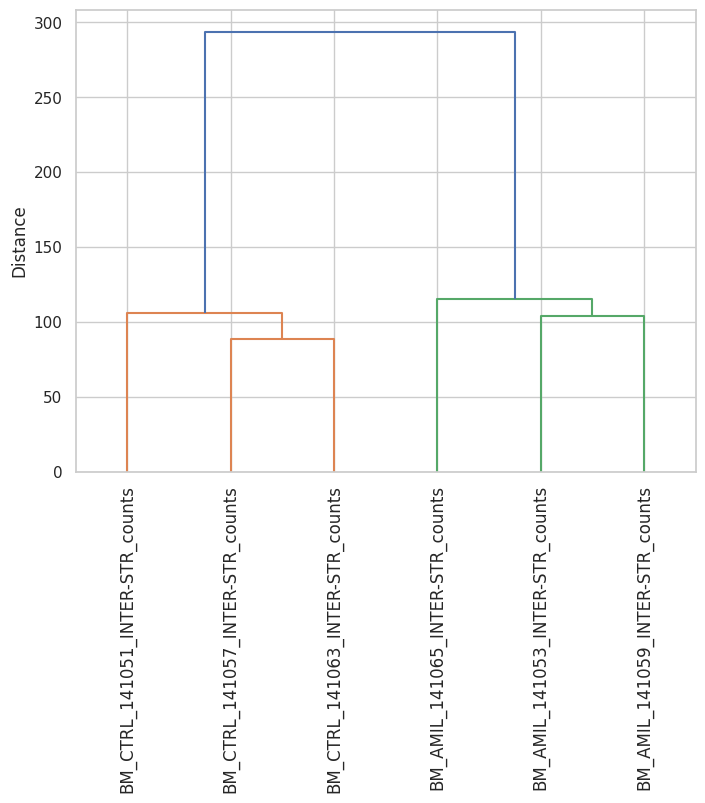

In [ ]:
# perform hierarchical clustering and create dendrogram
h_clustering = linkage(log_counts.T, 'ward')
plt.figure(figsize=(8, 6))
dendrogram(h_clustering, labels=countlist_no_name.columns)
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.show()

The image above shows the results of hierarchical clustering, which can be visualized via a dendrogram. When viewing a dendrogram, special attention should be paid to the cluster groupings and branches. Samples clustered together are more similar to each other, and the length of the branches (vertical lines) connecting clusters represents the distance or dissimilarity between clusters.

The chart above shows that our three control samples are clustered on the right, whereas our three experimental (i.e.,m amiloride-exposed) samples are clustered together on the left. This is a good sign, suggesting that the control and experimental groups are distinct and that there is biological variation between the two groups of samples. Thus, we can feel confident that our downstream differential expression analyses will provide meaningful results.

In [ ]:
#write out csv file
countlist.to_csv('countlist_2.csv')
from google.colab import files
files.download('countlist_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can find the CSV with the countlists HERE

## **Quality Control, Filtering, and Normalization**

The next step in our analysis is to filter out genes with low expression levels across all samples, which can introduce noise in the data. By filtering these out, you can make your results more reliable and improve your statistical power, making detecting real biological differences between conditions easier. Additionally, filtering out genes with low expression counts decreases computational load by reducing the number of genes in your dataset, making future downstream analyses faster.

To determine the optimal filtering criteria, I'll plot the number of genes retained with different filtering criteria, as demonstrated below.



In [ ]:
# plot the number of genes retained as a function of differnet CPM thresholds
def plot_genes_retained_by_cpm(data, min_samples=2):
    # convert raw counts to CPM to normalize the data
    cpm = data.apply(lambda x: (x / x.sum()) * 1e6) #convert raw counts to CPM to normalize
    # define a range of CPM thresholds to test, from 0 to 5 with increments of 0.1
    thresholds = np.arange(0, 5, 0.1)
    # initialize list to store the # of genes retained for ea/ threshold
    genes_retained = []

    # loop through ea/ threshold value to determine the # of genes retained
    for min_cpm in thresholds:
        # create mask where CPM > min_cpm in at least min_samples samples
        mask = (cpm > min_cpm).sum(axis=1) >= min_samples
        # count # of genes that meet the criteria and append to the list
        genes_retained.append(mask.sum())

    # plot # of genes retained as a function of CPM threshold
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, genes_retained, marker='o', color='green')
    plt.axvline(x=1.0, color='red', linestyle='--', label='CPM = 1')
    plt.xlabel('Threshold (CPM)')
    plt.ylabel('Num Genes Retained')
    plt.legend()
    plt.show()

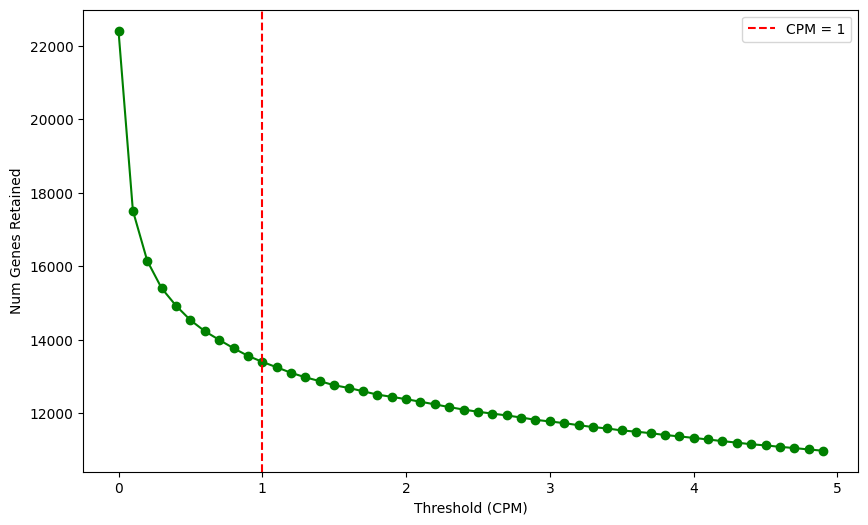

In [ ]:
# Drop the Gene Name column from countlist for counting
countlist_no_name = countlist.iloc[:, 1:]

# call plot_genes_retained_by_cpm function
plot_genes_retained_by_cpm(countlist_no_name)

Based on the data in the chart above, we'll filter genes with an expression threshold of <0.75 CPM. For many bulk RNA-seq datasets, a CPM threshold of 1 is a common filtering point, but 0.75 is slightly more lenient is justifiable given the distribution of our data. Now, In the code block below, I'll show you how perform basic filtering and normalization.



In [ ]:
def filter_normalize(data, min_cpm=1.0, min_samples=2):
    # Separate the gene_name column
    gene_names = data.iloc[:, 0]  # First column is gene_name
    raw_counts = data.iloc[:, 1:]  # Remaining columns are raw counts

    # Convert raw counts to CPM
    cpm = raw_counts.apply(lambda x: (x / x.sum()) * 1e6, axis=0)

    # Filter genes based on CPM thresholds
    mask = (cpm > min_cpm).sum(axis=1) >= min_samples  # Keep genes with CPM > min_cpm in at least min_samples
    filtered_counts = raw_counts[mask]
    filtered_gene_names = gene_names[mask]

    # Compute geometric mean of non-zero values for each gene
    geometric_means = filtered_counts.apply(lambda row: np.exp(np.log(row[row > 0]).mean()), axis=1)

    # Calculate size factors by dividing each gene expression by its geometric mean
    size_factors = filtered_counts.div(geometric_means, axis=0).median(axis=0)

    # Normalize data by dividing each gene expression by the size factors
    normalized_counts = filtered_counts.div(size_factors, axis=1)

    # Add back the gene_name column
    normalized_data = pd.concat([filtered_gene_names, normalized_counts], axis=1)

    # Return normalized data as a DataFrame
    return normalized_data

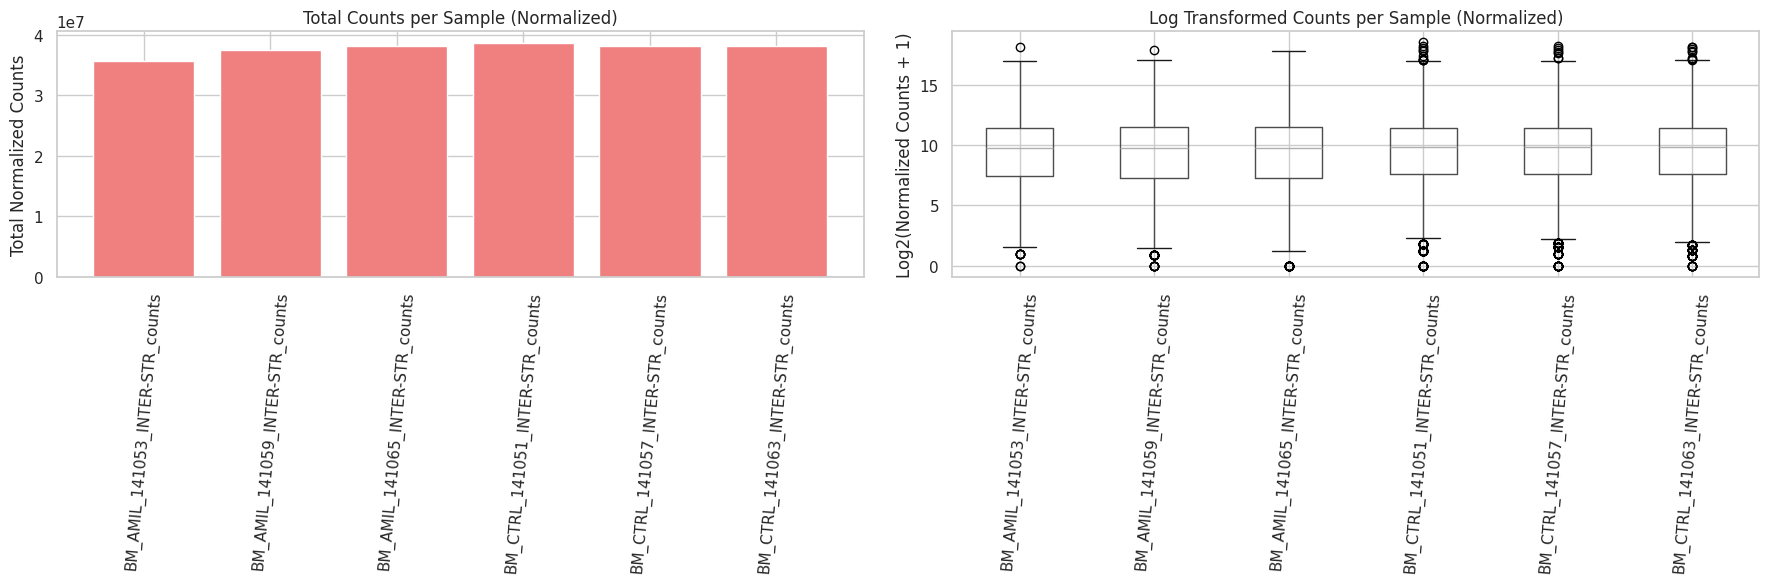

In [ ]:
# Apply the function to filter and normalize the data
filtered_normalized_countlist = filter_normalize(countlist, min_cpm=0.70)

# Plot the distribution of data after normalization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Total normalized counts per sample
total_counts_normalized = filtered_normalized_countlist.iloc[:, 1:].sum(axis=0)  # Exclude gene_name column
axes[0].bar(filtered_normalized_countlist.columns[1:], total_counts_normalized, color='lightcoral')
axes[0].set_ylabel('Total Normalized Counts')
axes[0].set_title('Total Counts per Sample (Normalized)')
axes[0].tick_params(axis='x', rotation=85)

# Log-transformed normalized counts per sample
log_normalized_data = filtered_normalized_countlist.iloc[:, 1:].apply(lambda x: np.log2(x + 1), axis=0)  # Exclude gene_name column
log_normalized_data.boxplot(ax=axes[1])
axes[1].set_ylabel('Log2(Normalized Counts + 1)')
axes[1].set_title('Log Transformed Counts per Sample (Normalized)')
axes[1].tick_params(axis='x', rotation=85)

plt.tight_layout()
plt.show()

In [ ]:
#write out csv file
filtered_normalized_countlist.to_csv('filtered_normalized_countlist.csv')
from google.colab import files
files.download('filtered_normalized_countlist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can find the CSV with the filtred and normalzied data HERE

# **🧬 Analyses**

This section is broken into four sub-sections:

- Weighted Gene Co-Expression Network Analysis: Identified coordinated patterns of gene expression across both the treatment and control groups.
- Differential Expression Analysis: Identifies genes with significant changes in expression between Alzheimer’s disease models and wild-type controls.
- PPI Network Analysis: Constructs protein-protein interaction networks to highlight key hub proteins and assess connectivity among differentially expressed genes.
- Functional Enrichment Analysis: Explores the biological processes, molecular functions, and cellular components associated with differentially expressed genes.


## **Weighted Gene Co-Expression Network Analysis**

A separate co-expression analyses for the treatment and control groups is particularly useful if you are interested in comparing network structures and identifying condition-specific modules or hub genes. By analyzing each group independently, you can uncover gene modules that are unique to a specific condition. For instance, modules found only in the treatment group may represent biological pathways disrupted by the Amilioride treatment or central regulators impacted by the drug, while those unique to the control group may reflect unperturbed regulatory networks in the JJN3 cell line. This approach also allows you to compare network properties such as connectivity, hub gene identification, and module composition between the two groups, which can reveal critical differences in gene regulation under treatment vs control conditions.



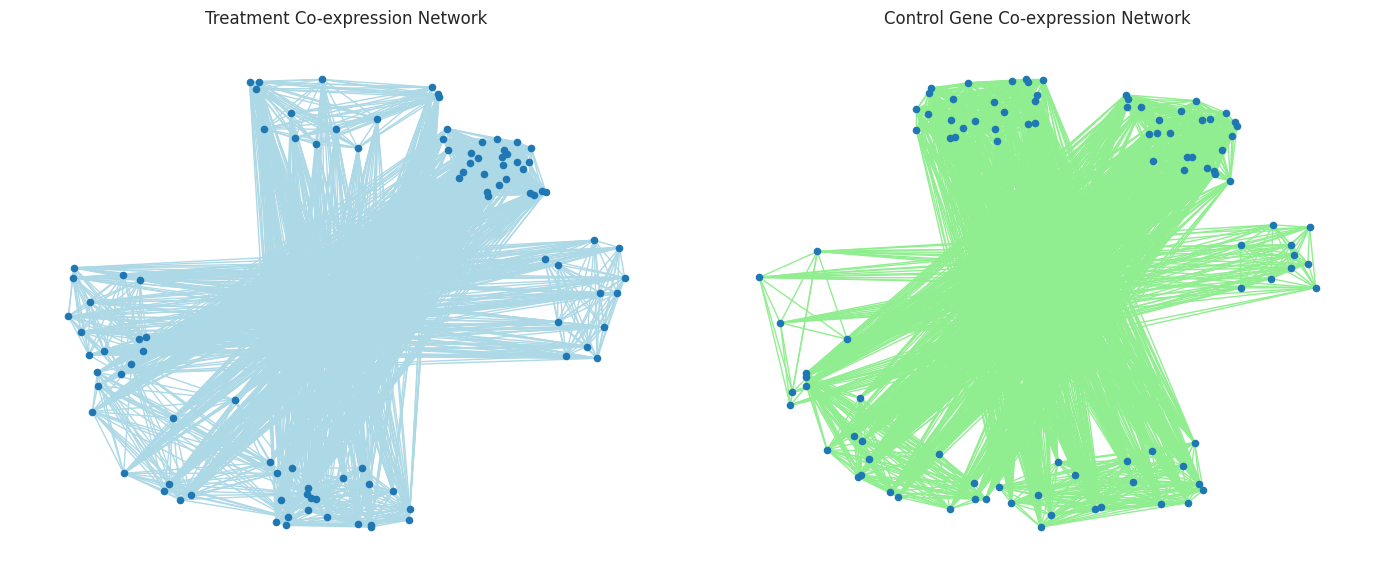

Top 10 hub genes in Treatment network:
[('FIRRM', 42), ('GCLC', 42), ('NFYA', 42), ('STPG1', 42), ('LAS1L', 42), ('KRIT1', 42), ('LAP3', 42), ('HECW1', 42), ('SNX11', 42), ('M6PR', 42), ('CFLAR', 42), ('NDUFAF7', 42), ('SARM1', 42), ('PLXND1', 42), ('FKBP4', 42), ('RBM6', 42), ('VPS50', 42), ('ARHGAP33', 42), ('CDC27', 42), ('HCCS', 42)]

Top 10 hub genes in Control network:
[('DPM1', 41), ('FUCA2', 41), ('GCLC', 41), ('NIPAL3', 41), ('ENPP4', 41), ('KRIT1', 41), ('LASP1', 41), ('SNX11', 41), ('M6PR', 41), ('NDUFAF7', 41), ('POLDIP2', 41), ('AK2', 41), ('FKBP4', 41), ('RBM6', 41), ('CAMKK1', 41), ('RECQL', 41), ('ARHGAP33', 41), ('NDUFAB1', 41), ('ARX', 41), ('SLC25A13', 41)]


In [ ]:
# Subset the data to exclude rows with NaN values in the "Gene_Name" column
filtered_normalized_countlist = filtered_normalized_countlist.dropna(subset=["Gene_Name"])

# Subset data for treatment and control
treatment = filtered_normalized_countlist.filter(regex="AMIL")  # Select columns with "AMIL" in their names
control = filtered_normalized_countlist.filter(regex="CTRL")  # Select columns with "CTRL" in their names

# Ensure the expression data is numeric
treatment_data_numeric = treatment.apply(pd.to_numeric, errors='coerce')
control_numeric = control.apply(pd.to_numeric, errors='coerce')

# Set Gene_Name as the index for easier gene identification
treatment_data_numeric = treatment_data_numeric.set_index(filtered_normalized_countlist["Gene_Name"])
control_numeric = control_numeric.set_index(filtered_normalized_countlist["Gene_Name"])

# Select the first 100 rows (genes) for each group
treatment_data_numeric = treatment_data_numeric.iloc[:100, :]
control_numeric = control_numeric.iloc[:100, :]

# Transpose the expression data to focus on gene co-expression (genes as rows)
treatment_transposed = treatment_data_numeric.T  # Transpose for co-expression (samples as rows)
control_transposed = control_numeric.T  # Transpose for WT group

# Function to calculate pairwise correlations
def calculate_correlation_matrix(expression_data):

    correlation_matrix = expression_data.corr(method="spearman")  # Spearman correlation
    return correlation_matrix

# Calculate the correlation matrices separately for 5xFAD and WT groups
treatment_corr_matrix = calculate_correlation_matrix(treatment_transposed)
control_corr_matrix = calculate_correlation_matrix(control_transposed)

# Create networks for both treatment and control groups
def create_network(corr_matrix, threshold=0.7):
    G = nx.Graph()
    for i, gene1 in enumerate(corr_matrix.index):
        for j, gene2 in enumerate(corr_matrix.columns):
            if i < j:  # Avoid duplicate pairs
                correlation = corr_matrix.iloc[i, j]
                if abs(correlation) >= threshold:  # Apply threshold
                    G.add_edge(gene1, gene2, weight=correlation)
    return G

# Create networks
treatment_network = create_network(treatment_corr_matrix)
control_network = create_network(control_corr_matrix)

# Plot side-by-side subgraphs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
pos_treatment = nx.spring_layout(treatment_network, seed=42)
nx.draw(treatment_network, pos_treatment, with_labels=False, node_size=20, edge_color="lightblue")
plt.title("Treatment Co-expression Network")
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
pos_control = nx.spring_layout(control_network, seed=42)
nx.draw(control_network, pos_control, with_labels=False, node_size=20, edge_color="lightgreen")
plt.title("Control Gene Co-expression Network")
plt.tight_layout()
plt.show()

# Identify and print top 10 hub genes for both networks
treatment_degrees = dict(treatment_network.degree())
sorted_treatment_genes = sorted(treatment_degrees.items(), key=lambda x: x[1], reverse=True)
print("Top 10 hub genes in Treatment network:")
print(sorted_treatment_genes[:20])
control_degrees = dict(control_network.degree())
sorted_control_genes = sorted(control_degrees.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 hub genes in Control network:")
print(sorted_control_genes[:20])

Now that we've created two seperate gene co-expression networks, there are several interesting analyses you can perform. To start, let's compare the density of both networks, which will tell us how well connected the genes are in each group:



In [ ]:
density_treatment = nx.density(treatment_network)
density_control = nx.density(control_network)
print(f"Density of Treatment network: {density_treatment}")
print(f"Density of Control network: {density_control}")

Density of Treatment network: 0.3432323232323232
Density of Control network: 0.37212121212121213


Based on the results above, we can see that the density of the treatment network is slightly lower than, indicating that the gene co-expression relationships in this network are sparser. This may suggest that the regulatory relationships between genes in the treatment condition are more selective or disrupted compared to the control condition, which may reflect altered or less cohesive interactions following drug treatment.

Next, we'll look at the average degree of nodes in each network, which can indicate the overall connectivity in each condition:

In [ ]:
avg_degree_treatment = sum(dict(treatment_network.degree()).values()) / len(treatment_network.nodes)
avg_degree_control = sum(dict(control_network.degree()).values()) / len(control_network.nodes)
print(f"Average degree in treatment network: {avg_degree_treatment}")
print(f"Average degree in control network: {avg_degree_control}")

Average degree in treatment network: 33.98
Average degree in control network: 36.84


As expected bases on the previous analysis, the treatment network has a lower average degree than the control network. Now that we've highlighted some differences between the two networks, we'll perform a cross-network hub gene analysis to see if there are any overlapping hub genes between the two networks:



In [ ]:
# Set of hub genes for treatment and control networks
hub_genes_treatment = set([gene for gene, degree in sorted_treatment_genes[:10]])
hub_genes_control = set([gene for gene, degree in sorted_control_genes[:10]])

# Find common and unique hub genes
common_hub_genes = hub_genes_treatment.intersection(hub_genes_control)
unique_treatment_hub_genes = hub_genes_treatment - hub_genes_control
unique_control_hub_genes = hub_genes_control - hub_genes_treatment
print(f"Common hub genes: {common_hub_genes}")
print(f"Unique treatment hub genes: {unique_treatment_hub_genes}")
print(f"Unique control hub genes: {unique_control_hub_genes}")

Common hub genes: {'SNX11', 'M6PR', 'GCLC', 'KRIT1'}
Unique treatment hub genes: {'LAP3', 'FIRRM', 'STPG1', 'HECW1', 'NFYA', 'LAS1L'}
Unique control hub genes: {'FUCA2', 'NIPAL3', 'NDUFAF7', 'ENPP4', 'LASP1', 'DPM1'}


The analysis reveals three common hub genes between the treatment and control networks—LAS1L, STRIP1, and NFYA—suggesting that these genes maintain core co-expression relationships in multiple myeloma cells, regardless of amiloride treatment. These genes are primarily involved in ribosomal biogenesis (LAS1L), transcriptional regulation (NFYA), and cellular signaling (STRIP1), processes essential for cell survival and proliferation. Their persistence in both conditions indicates they may represent fundamental regulatory nodes in myeloma biology rather than drug-specific targets.

Beyond these shared hubs, the networks exhibit distinct condition-specific hub genes, reflecting differences in regulatory activity between untreated and amiloride-treated cells. The treatment network features hub genes associated with apoptosis (BAD, SARM1), mitotic arrest (MAD1L1, ENP4), and cellular stress responses (RBM5), highlighting key mechanisms through which amiloride exerts its cytotoxic effects. Notably, the presence of genes involved in programmed cell death and disruption of cell division suggests that amiloride may drive myeloma cell elimination by interfering with critical survival pathways. Additionally, genes linked to immune signaling (ARF5) and vesicle trafficking (DBNDD1) appear to be upregulated in response to treatment, hinting at broader disruptions in cellular homeostasis.

In contrast, the control network is enriched for genes involved in oxidative stress defense (GCLC, FUCA2), cytoskeletal remodeling (LASP1, ANKIB1), and tumor microenvironment interactions (SEMA3F, KRIT1, FIRRM). These genes likely support myeloma cell survival, allowing them to withstand intrinsic and extrinsic stressors. Additionally,  presence of genes linked to antioxidant production and structural integrity suggests that untreated myeloma cells rely on these mechanisms to maintain their aggressive phenotype. Furthermore, several genes in the control network are implicated in tumor progression and immune evasion (SEMA3F, KRIT1, FIRRM), reinforcing their role in sustaining the malignant state of myeloma cells.

Together, these findings suggest that while amiloride disrupts key survival pathways, myeloma cells in the untreated condition rely on metabolic adaptation, oxidative stress resistance, and microenvironmental interactions to sustain their growth. The distinct hub genes identified in each condition provide insight into the molecular shifts induced by treatment and highlight potential targets for future therapeutic interventions aimed at enhancing amiloride’s efficacy.

Finally, we'll look at edge weight distributions, which allows us to compare the distribution of correlation strengths between the treatment and control networks, telling us if certain gene pairs have stronger or weaker co-expression in one group compared to another:

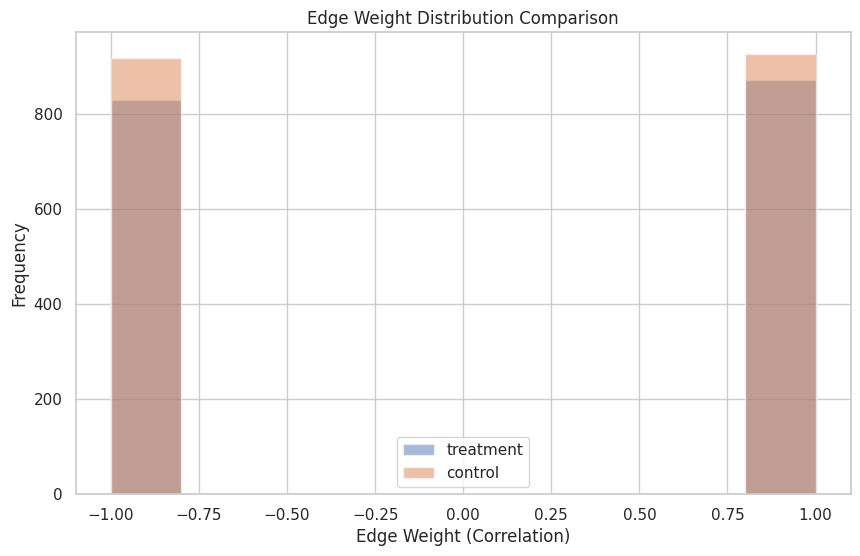

In [ ]:
# Extract edge weights from treatment and control networks
edge_weights_treatment = [data['weight'] for _, _, data in treatment_network.edges(data=True)]
edge_weights_control = [data['weight'] for _, _, data in control_network.edges(data=True)]
plt.figure(figsize=(10, 6))
plt.hist(edge_weights_treatment, bins=10, alpha=0.5, label='treatment')
plt.hist(edge_weights_control, bins=10, alpha=0.5, label='control')
plt.legend()
plt.title('Edge Weight Distribution Comparison')
plt.xlabel('Edge Weight (Correlation)')
plt.ylabel('Frequency')
plt.show()

The edge weight distributions reveal subtle shifts in co-expression patterns between the treatment and control networks. The control network exhibits a higher frequency of strongly correlated gene pairs (edge weights in the ±0.8 to ±1.0 range), suggesting that under normal conditions, myeloma cells maintain highly coordinated gene expression relationships. In contrast, amiloride treatment appears to disrupt this structured regulatory architecture, potentially weakening existing gene-gene interactions or restructuring co-expression modules.

This disruption may underlie amiloride’s therapeutic effect—by dismantling critical transcriptional networks, the drug could be impairing pathways essential for myeloma cell survival. However, to fully understand its mechanism of action, we need to move beyond global co-expression changes and examine how specific genes are upregulated or downregulated in response to treatment.

## **Differential Expression Analysis**

Now that we've performed a gene co-expression network analysis, we'll perform differential expression analysis to identify up an down regulated genes in our treatment group. In this case, I used a pairwise analysis, which involves comparing gene expression levels between individual pairs of control and experimental samples. For example, I compared control sample 1 to experimental sample 1, control sample 2 to experimental sample 2, etc.

Pairwise analyses are useful when working with small sample sizes, as we currently are. Additionally, pairwise comparison can be more precise because it compares matched samples, reducing variability caused by biological differences between samples and batch effects.

In [ ]:
# Separate the groups
treated_columns = ['BM_AMIL_141053_INTER-STR_counts', 'BM_AMIL_141059_INTER-STR_counts', 'BM_AMIL_141065_INTER-STR_counts']
control_columns = ['BM_CTRL_141051_INTER-STR_counts', 'BM_CTRL_141057_INTER-STR_counts', 'BM_CTRL_141063_INTER-STR_counts']

# Initialize a list to store results
results = []

# Perform differential expression analysis for each gene
for gene in filtered_normalized_countlist.index:
    # Extract treated and control group data for the current gene
    treated = pd.to_numeric(filtered_normalized_countlist.loc[gene, treated_columns], errors='coerce')
    control = pd.to_numeric(filtered_normalized_countlist.loc[gene, control_columns], errors='coerce')

    # Drop NaN values if present
    treated = treated.dropna()
    control = control.dropna()

    # Skip genes where either group is empty after coercion
    if treated.empty or control.empty:
        continue

    # Calculate mean expression levels for control and treated groups
    mean_control = np.mean(control)
    mean_treated = np.mean(treated)

    # Compute log2 fold change, adding 1 to avoid log(0)
    log2fc = np.log2((mean_treated + 1) / (mean_control + 1))

    # Perform t-test to compare control and treated groups
    t_stat, p_val = ttest_ind(treated, control)

    # Append results for the current gene to the results list
    results.append({"gene": gene,"Gene_Name": filtered_normalized_countlist.loc[gene, "Gene_Name"],"log2fc": log2fc,"t_stat": t_stat,"p_val": p_val})

# Convert results list to DataFrame for easier manipulation
results_df = pd.DataFrame(results)

# Convert p-values to numeric values, coercing errors to NaN if conversion fails
results_df['p_val'] = pd.to_numeric(results_df['p_val'], errors='coerce')
results_df = results_df.dropna(subset=['p_val'])

# Extract p-values as a numpy array for multiple testing correction
pvals = results_df['p_val'].values

# Apply multiple testing correction using Benjamini-Hochberg method
results_df['p_adj'] = multipletests(results_df['p_val'], method='fdr_bh')[1]

# Calculate the absolute value of log2 fold change
results_df['abs_log2fc'] = results_df['log2fc'].abs()

# Filter results to get differentially expressed genes (DEGs) with p_adj < 0.05 and |log2fc| > 1
deg_Amilioride = results_df[(results_df['p_adj'] < 0.075) & (results_df['abs_log2fc'] > 0.75)]

The code above performs a differential expression analysis on gene expression data, and the final output, deg_Amilioride, is a DataFrame containing the genes that are significantly differentially expressed between the treatment and control samples.

Notably, the filtering criteria for DEGS is a log2fc > 0.75 and an adjusted p-value of <0.075. These are a little less stringent than the standard criteria of log2fc > 1 and a adjusted p-value of 0.05. A log2FC of 0.75 corresponds to a fold change of about 1.68 (or ~68% increase/decrease in expression), which is biologically significant in many contexts but less strict than a log2FC of 1 (two-fold change). It includes genes with moderate changes in expression, capturing more potential candidates than stricter criteria. Additionally a adjusted pvalue are used to control the false discovery rate (FDR). A threshold of 0.075 is less strict than 0.05, meaning it allows for a slightly higher rate of false positives. This threshold is useful when working with smaller sample sizes, as is the case in this scenario.

Now that we have a dataframe of differentially expressed genes, we can view the distribution of Absolute log fold changes, as demonstrated in the code block below.

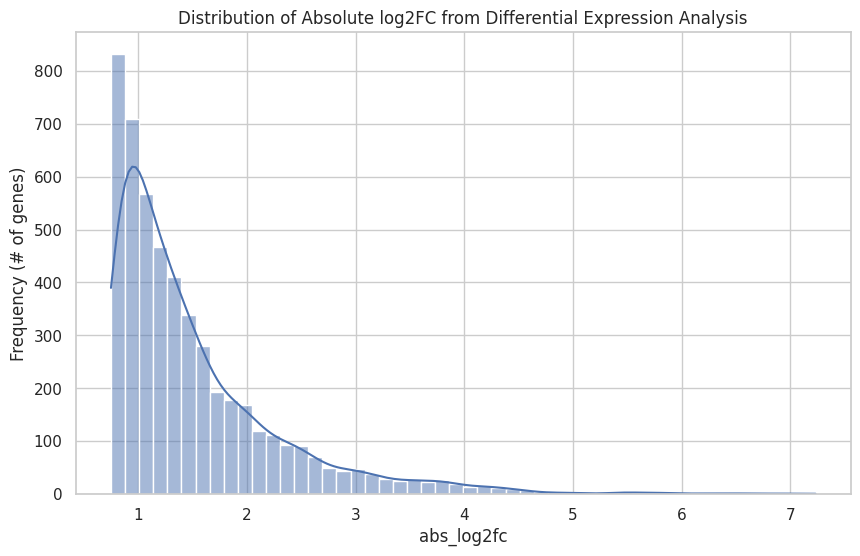

In [ ]:
# view distribution of scores
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(deg_Amilioride['abs_log2fc'], bins=50, kde=True)
plt.title('Distribution of Absolute log2FC from Differential Expression Analysis')
plt.xlabel('abs_log2fc')
plt.ylabel('Frequency (# of genes)')
plt.show()

Notably, the image above displays the total number of genes at each absolute log-2 fold change. We can see that the distribution is "right skewed", which means that most of the data is concentrated on the left side of the distribution, with a longer tail extending to the right. In essence, this means that the majority of genes have a absolute log2 fold change closer to 1.

We'll also use a volcano plot to better understand our data. A volcano plot is a type of scatter plot commonly used in genomics and other areas of bioinformatics to visualize the results of differential expression analysis and help identify statistically significant changes in gene expression between different conditions. In the code block below, I'll create a volcano plot using our data frame of filtered differentially expressed genes. The first plot will be from our results_df DataFrame before filtering, then the second plot will be from our deg_Amilioride DataFrame, a after filtering out genes that do not meet our selection criteria:

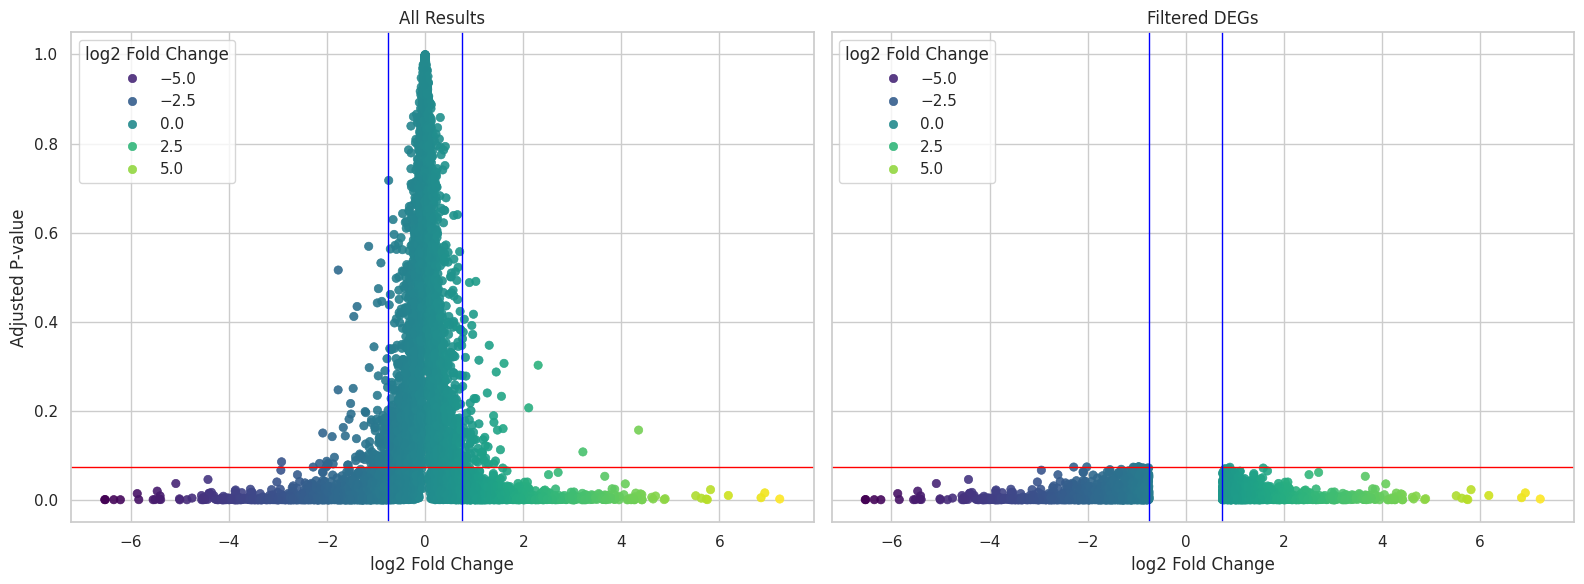

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Subplot 1: Scatterplot for the full results_df
sns.scatterplot(data=results_df, x='log2fc', y='p_adj', hue='log2fc', palette='viridis', alpha=0.9, edgecolor=None, ax=axes[0])
axes[0].axhline(y=0.075, color='red', linestyle='-', linewidth=1)
axes[0].axvline(x=0.75, color='blue', linestyle='-', linewidth=1)
axes[0].axvline(x=-0.75, color='blue', linestyle='-', linewidth=1)
axes[0].set_xlabel('log2 Fold Change')
axes[0].set_ylabel('Adjusted P-value')
axes[0].legend(title='log2 Fold Change', loc='upper left')
axes[0].set_title('All Results')

# Subplot 2: Scatterplot for the filtered DEGs (deg_Amilioride)
sns.scatterplot(data=deg_Amilioride, x='log2fc', y='p_adj', hue='log2fc', palette='viridis', alpha=0.9, edgecolor=None, ax=axes[1])
axes[1].axhline(y=0.075, color='red', linestyle='-', linewidth=1)
axes[1].axvline(x=0.75, color='blue', linestyle='-', linewidth=1)
axes[1].axvline(x=-0.75, color='blue', linestyle='-', linewidth=1)
axes[1].set_xlabel('log2 Fold Change')
axes[1].set_ylabel('Adjusted P-value')
axes[1].legend(title='log2 Fold Change', loc='upper left')
axes[1].set_title('Filtered DEGs')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

As you can see in the image above, our volcano plot combines two critical pieces of information for each gene: the magnitude of change (fold change) and the statistical significance (p-value) of that change. Specifically, the x-axis on this graph shows the log2 fold change between the control and experimental samples in our pairwise analysis. A positive value indicates an upregulation of a gene in the experimental group compared to the control, and a negative value represents downregulation of a gene in the experimental group compared to the control. Additionally, the y-axis shows the significance of said change in gene expression.

Thus, when viewing this graph, we are most interested in the two boxes formed in the lower left and lower right corners, which represent down-regulated and up-regulated genes with high statistical significance. This type of chart also allows us to see how changing our criteria for defining differentially expressed genes can impact the total number of genes in our dataset.

In [ ]:
#write out csv file
deg_Amilioride.to_csv('deg_Amilioride.csv')
from google.colab import files
files.download('deg_Amilioride.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can find the CSV of differentially expressed genes HERE

---



## **PPI Network Analysis**


In the last analysis, we identified differentially expressed genes (DEGs) in the treatment versus control group. Now, we'll map these DEGs to a PPI networkto tp visualize how the proteins encoded by the DEGS interact with one another. Additionally, analyzing the PPI network allows us to identify biological pathways and cellular processes that are significantly influenced by the experimental conditions following Amilioride treatment.



The figure above illustrates how the up- and down-regulated genes in our experimental system, collectively referred to as DEGs, are mapped to their corresponding protein products. Ideally, all DEGs in our CSV file should map to the PPI (protein-protein interaction) network, provided the corresponding protein interactions for each gene exist in the database we are using.

Mapping DEGs to a PPI network allows us to focus on the proteins encoded by these genes and understand how they interact within a biological system. For instance, if a genes like GCLC or CASP10 are present in our DEG list, they encodes a specific protein. Those proteins might interact with other proteins in the PPI network. By mapping DEGs to the network, we can visualize and analyze these connections, offering deeper insights into the molecular interactions underlying our experimental system.

However, upon closer inspection, we may notice that some proteins in the PPI network are not directly encoded by genes in our DEG list. This discrepancy arises because the differentially expressed genes in our analysis represent only a subset of the proteins involved in the biological processes we are studying. A PPI network, on the other hand, includes all proteins (not just DEGs) and their interactions. This means that even proteins not differentially expressed may still appear in the network if they interact with DEGs. These non-DEG proteins could play essential roles as intermediaries between DEGs, participate in compensatory or regulatory mechanisms, or contribute to broader network stability and function.

To better understand the structure of our PPI network, we can begin by examining key network properties, such as the number of nodes, edges, and overall network density. These metrics provide an overview of the network’s connectivity and complexity, which we’ll explore with the code below:

In [ ]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G)}")

NameError: name 'G' is not defined

To interpret the results of our network analysis, let's break down the key metrics in detail:

- Nodes: Our network contains 482 nodes, representing the unique proteins present in the protein-protein interaction (PPI) network. These nodes correspond to proteins encoded by the differentially expressed genes (DEGs) in our dataset. However, it's worth noting that our DEG list initially contained ~1200 genes, meaning not all DEGs could be mapped to the PPI network. This discrepancy could arise for several reasons. For example, some DEGs may not have corresponding protein interaction data available in the PPI database. Alternativley, the analysis settings may filter out low-confidence interactions or proteins with weak evidence of interaction, highlighting the importance of understanding the limitations of the PPI database and the filtering criteria applied during network construction.

- Edges: The network has 902 edges, which represent the interactions (connections) between the proteins in the network. A higher number of edges relative to nodes suggests a more interconnected network, where many proteins interact with multiple partners.

- Network Density: The network density is 0.008, which measures the proportion of realized edges compared to the total possible edges. In this case, only about 0.8% of all potential connections are present. While 902 edges may seem substantial, the theoretical maximum number of edges for a network with 483 nodes is in the tens of thousand. The low density reflects that most proteins in the network do not interact directly with each other, leading to a sparsely connected network.

In the context of the our experimental desig, a lower network density and sparse connectivity are biologically meaningful. Our experiment is designed to test the efects of Amilioride, a cancer therapeutic. Thus, the DEGs in our CSV file are likely associated with Amiliorides cell-killing effects rather than being broadly expressed across all cellular functions. As a result, the corresponding PPI network reflects the focused nature of these interactions.

While we’ve established that our network is sparse, the next question is whether it is fragmented. A fragmented network would contain multiple disconnected components, meaning there are proteins or groups of proteins that do not interact with the rest of the network. Identifying whether the network is fragmented will help us determine how cohesive the identified interactions are and whether the DEGs form a unified system or several distinct sub-networks. Let’s explore this further:

Number of clusters: 37


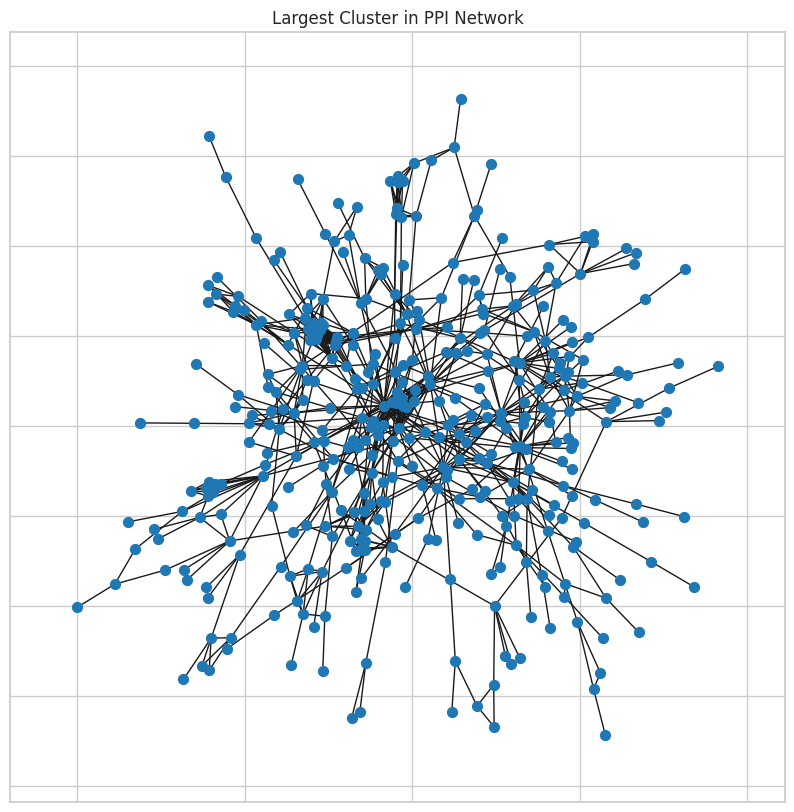

In [ ]:
# Find connected components
components = list(nx.connected_components(G))
print(f"Number of clusters: {len(components)}")

# Get the largest cluster
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)

# Visualize the largest cluster
plt.figure(figsize=(10, 10))
nx.draw_networkx(subgraph, node_size=50, with_labels=False)
plt.title("Largest Cluster in PPI Network")
plt.show()

Using the code above, we observe 37 distinct clusters within our PPI network. The presence of clusters in a PPI network is a strong indication of functional organization. Proteins that cluster together tend to participate in similar biological pathways, such as signaling cascades, metabolic processes, or cellular responses. For instance, one cluster might represent proteins involved in apoptosis, while another might include proteins related to a mitotic. arrest. Clustering allows us to pinpoint these specific processes and focus on the biological mechanisms most impacted by the experimental condition.

Additionally, the combination of a sparse network and multiple clusters provides additional insights. While the overall network is not densely interconnected (as reflected by the low network density), the clusters indicate that certain subsets of proteins are tightly connected. This means that while the DEGs may not form a globally interconnected network, they do organize into biologically meaningful groupings. These clusters are likely to represent key processes relevant to the disease, even if they do not interact extensively with one another across the network.

To further understand the importance of these clusters and the overall connectivity of our PPI network, we can delve into additional metrics such as degree centrality, betweenness centrality, and the clustering coefficients, which can help uncover key proteins and interactions within the clusters that are most relevant to the biological processes under investigation.

Network analysis metrics such as degree centrality, betweenness centrality, and clustering coefficient each offer unique perspectives on the connectivity and significance of individual proteins within a protein-protein interaction (PPI) network. Together, these measures help identify key players, mediators, and tightly-knit communities within the network, providing critical insights into the biological mechanisms underlying your experimental system. In the code below, we'll identify the top 10 proteins based on each of these metrics:



In [ ]:
# Find top 10 nodes by degree centrality
degree_centrality = nx.degree_centrality(G)
top_degree_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by degree centrality:", top_degree_nodes)

# Find top 10 nodes by betweeness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by betweenness centrality:", top_betweenness_nodes)

# Find top 10 nodes by clustering coefficient
clustering_coefficients = nx.clustering(G)
top_10_clustering_nodes = sorted(clustering_coefficients.items(), key=lambda item: item[1], reverse=True)[:10]
print("Top 10 nodes with highest clustering coefficients:")
for node, coeff in top_10_clustering_nodes:
    print(f"Node: {node}, Clustering Coefficient: {coeff}")

Top 10 nodes by degree centrality: [('TP53', 0.07883817427385892), ('GAPDH', 0.05186721991701245), ('GPI', 0.03941908713692946), ('FN1', 0.03734439834024896), ('MT-CO1', 0.035269709543568464), ('ESR1', 0.03319502074688797), ('MAPK3', 0.03319502074688797), ('ARRB2', 0.03319502074688797), ('MT-ND4', 0.03319502074688797), ('MT-CO3', 0.03112033195020747)]
Top 10 nodes by betweenness centrality: [('TP53', 0.3282468371887895), ('GAPDH', 0.12993098583568735), ('MAPK3', 0.10390815660600804), ('ESR1', 0.08056421742014169), ('FN1', 0.07301441481316304), ('SREBF1', 0.06943457631899437), ('ARRB2', 0.05831606171513186), ('IL10', 0.05138599293564239), ('CALM3', 0.049220595706539395), ('MRPL13', 0.0382494956819904)]
Top 10 nodes with highest clustering coefficients:
Node: SLC2A3, Clustering Coefficient: 1.0
Node: SLC22A18, Clustering Coefficient: 1.0
Node: LAMB2, Clustering Coefficient: 1.0
Node: LAMB3, Clustering Coefficient: 1.0
Node: RAB26, Clustering Coefficient: 1.0
Node: PCLAF, Clustering Coeff

Degree centrality measures the number of direct connections a protein has within the network, identifying key hubs that serve as central regulators of cellular processes. Among the most highly connected proteins in this network, TP53 emerges as a dominant hub, reflecting its well-established role as a master regulator of cell cycle control and apoptosis. Its extensive connectivity suggests that it may exert widespread influence over multiple signaling pathways, potentially mediating the cellular response to amiloride treatment. Other highly connected proteins, such as GAPDH, GPI, and FN1, similarly play crucial roles in metabolic regulation, extracellular matrix interactions, and cytoskeletal organization, indicating their potential involvement in coordinating the biological effects of the drug.

While degree centrality highlights direct interactions, betweenness centrality identifies proteins that act as essential intermediaries, facilitating communication across the network. Here, TP53 once again ranks highest, reinforcing its role not only as a central hub but also as a key regulatory checkpoint that connects disparate biological pathways. Other proteins, such as MAPK3 and ESR1, also exhibit high betweenness centrality, suggesting they may influence multiple signaling cascades. MAPK3 (ERK1) is a critical player in the MAPK signaling pathway, which governs cell proliferation and survival, while ESR1 (estrogen receptor alpha) is involved in hormone signaling and transcriptional regulation. Their prominence in the network suggests that they may act as key mediators of cellular adaptation to treatment, potentially modulating stress response pathways or apoptotic mechanisms in response to amiloride exposure.

Finally, the clustering coefficient assesses how interconnected a node's neighbors are, revealing whether a protein is part of a tightly-knit community or functional module. A high clustering coefficient indicates that a protein’s neighbors form dense, cohesive sub-networks, often corresponding to specific biological processes or pathways. Interestingly, several proteins in this network, such as SLC2A3, SLC22A18, and LAMB2, exhibit the highest possible clustering coefficient of 1.0, meaning all their neighbors are fully connected. This suggests these proteins are embedded in highly specialized modules, which may represent discrete biological functions or localized responses within the broader network.

Taken together, these network properties offer complementary perspectives on the molecular landscape of amiloride’s effects. TP53 emerges as a dominant regulatory hub, simultaneously exhibiting high connectivity and network influence, reinforcing its role in stress response and apoptosis. MAPK3 and ESR1 act as key intermediaries, potentially linking metabolic and signaling pathways that shape the cellular response to treatment. Meanwhile, the presence of tightly clustered protein communities suggests that amiloride may be disrupting discrete biological processes, altering fundamental aspects of myeloma cell function. By integrating these insights, we can begin to unravel the network-level mechanisms underlying amiloride’s therapeutic action.










Finally, to better understand the role of key proteins in the network, we will create subgraphs for the top 10 nodes based on two centrality measures: degree centrality and betweenness centrality. These metrics help us identify the most influential nodes in the network, whether through their direct interactions or their ability to act as bridges connecting different regions of the network. Visualizing these subgraphs enables us to focus on these important nodes and their immediate connections, shedding light on their functional roles in the biological processes under study.



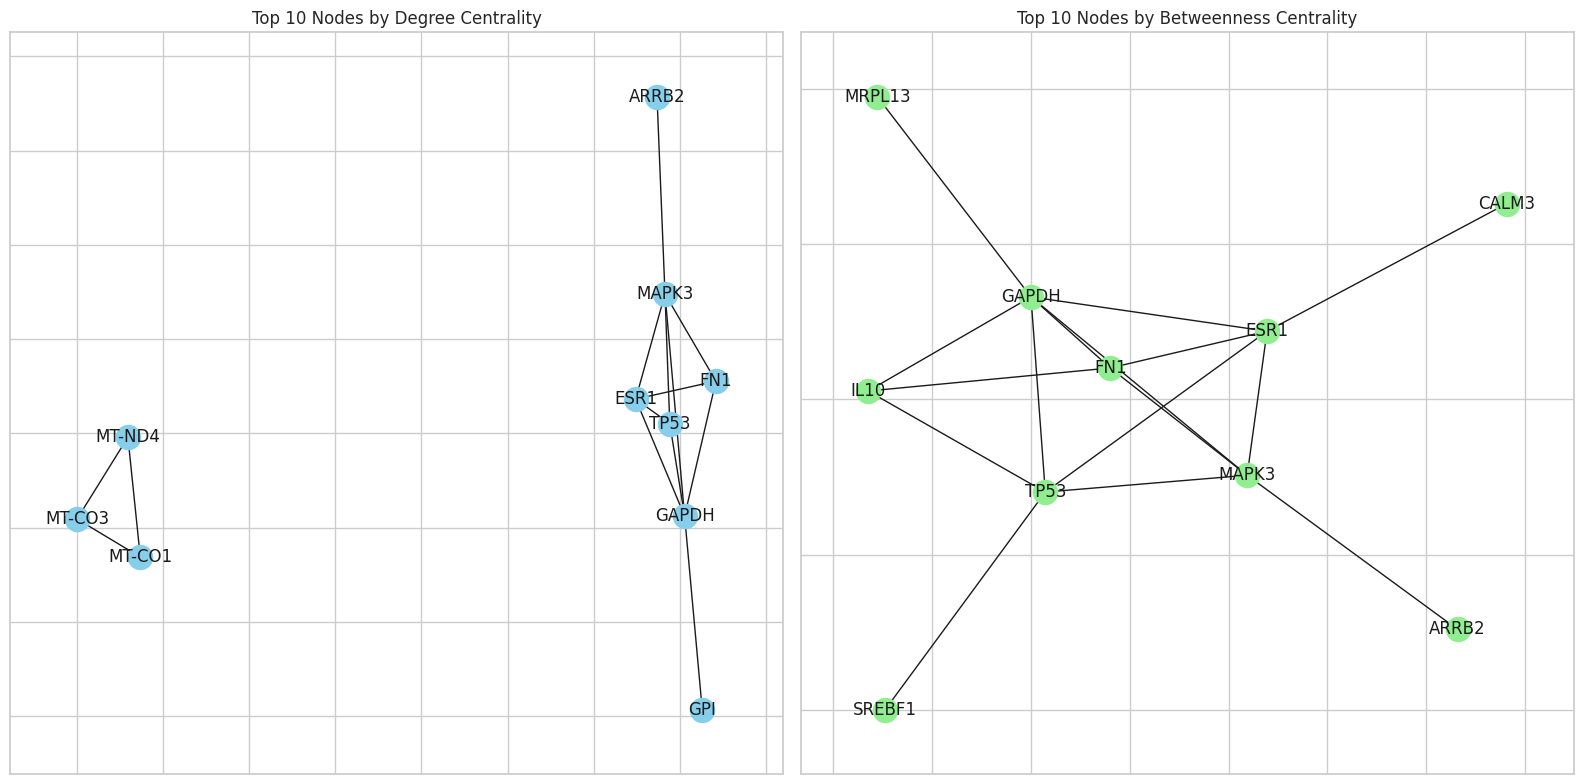

In [ ]:
# Create subgraph for top 10 nodes by degree centrality
top_degree_nodes_list = [node for node, _ in top_degree_nodes]
subgraph_degree = G.subgraph(top_degree_nodes_list)

# Create subgraph for top 10 nodes by betweenness centrality
top_betweenness_nodes_list = [node for node, _ in top_betweenness_nodes]
subgraph_betweenness = G.subgraph(top_betweenness_nodes_list)

# plot subgrapgs
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.sca(axes[0])
nx.draw_networkx(subgraph_degree, node_size=300, node_color='skyblue', with_labels=True)
plt.title("Top 10 Nodes by Degree Centrality")
plt.sca(axes[1])
nx.draw_networkx(subgraph_betweenness, node_size=300, node_color='lightgreen', with_labels=True)
plt.title("Top 10 Nodes by Betweenness Centrality")
plt.tight_layout()
plt.show()

To dive deeper, we can simulate how the top nodes based on degree centrality interact using systems of differential equations. These equations represent dynamic changes in protein concentrations over time, modeled as a function of their interactions with other proteins. This approach provides insights into the dynamics of key players in the biological network. If you're interested in learning more about this approach (which is not included in this analysis) you can check out the following article: https://github.com/evanpeikon/PPI_Network_Analysis


## **Functional Enrichment Analysis**

Finally,  perform a series of functional enrichment analyses, which allow us to identify and interpret the biological process, molecular functions, cellular components, and pathways that are overrepresented or significant in our list of differenrentially expressed genes.

### **Gene Ontology Analysis**
The first analysis we'll explore is Gene Ontology (GO) analysis, which categorizes differentially expressed genes according to their associated biological processes, cellular components, and molecular functions. This categorization is based on a structured, hierarchical vocabulary known as the Gene Ontology, which systematically describes gene functions.

While differential expression analysis identifies genes that are up- or down-regulated in response to an intervention, treatment, or drug regimen, GO analysis takes this a step further by linking these genes to broader biological contexts. By grouping genes into functional categories, GO analysis can reveal which biological processes, molecular functions, or cellular components are impacted, offering a more detailed understanding of the mechanisms through which an intervention, treatment, or drug exerts its effects.

In [ ]:
# Define the gene lists for each model (DEGs) here
gene_list_Amilioride = deg_Amilioride['Gene_Name'].dropna().astype(str).tolist()

# Perform GO enrichment analysis for Biological Process (BP), Molecular Function (MF), and Cellular Component (CC)
enrichment_Amilioride_BP = gp.enrichr(gene_list_Amilioride, gene_sets=['GO_Biological_Process_2018'], organism='human')

# Extract the Biological Process results for each
enrichment_Amilioride_BP = enrichment_Amilioride_BP.results

enrichment_Amilioride_BP.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,canonical glycolysis (GO:0061621),8/25,0.000073,0.077829,0,0,7.382378,70.328002,GPI;PGAM1;PGK1;ALDOC;ENO2;ALDOA;GAPDH;HK2
1,GO_Biological_Process_2018,glycolytic process through glucose-6-phosphate...,8/25,0.000073,0.077829,0,0,7.382378,70.328002,GPI;PGAM1;PGK1;ALDOC;ENO2;ALDOA;GAPDH;HK2
2,GO_Biological_Process_2018,glucose catabolic process to pyruvate (GO:0061...,8/25,0.000073,0.077829,0,0,7.382378,70.328002,GPI;PGAM1;PGK1;ALDOC;ENO2;ALDOA;GAPDH;HK2
3,GO_Biological_Process_2018,gluconeogenesis (GO:0006094),10/41,0.000122,0.097862,0,0,5.065191,45.636081,GPI;PGAM1;PGK1;PGAM4;ALDOC;SLC25A10;ENO2;SLC37...
4,GO_Biological_Process_2018,hexose biosynthetic process (GO:0019319),10/44,0.000229,0.135132,0,0,4.617524,38.695592,GPI;PGAM1;PGK1;PGAM4;ALDOC;SLC25A10;ENO2;SLC37...


This same analysis was then repeated for molecular functions (MF) and cellular components (CC),as demonstrated below:



In [ ]:
# Repeat the same for Molecular Function (MF)
enrichment_Amilioride_MF = gp.enrichr(gene_list_Amilioride, gene_sets=['GO_Molecular_Function_2018'], organism='human')

# Extract the Molecular Function results for each
enrichment_Amilioride_MF = enrichment_Amilioride_MF.results

enrichment_Amilioride_MF.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2018,MHC class II receptor activity (GO:0032395),5/10,0.000154,0.105753,0,0,15.658333,137.487005,HLA-DRA;HLA-DOA;HLA-DQA2;HLA-DQA1;HLA-DQB1
1,GO_Molecular_Function_2018,protein phosphatase 2B binding (GO:0030346),3/6,0.003802,0.653877,0,0,15.633943,87.117496,ATP2B4;AKAP5;SLC9A1
2,GO_Molecular_Function_2018,arginine transmembrane transporter activity (G...,3/6,0.003802,0.653877,0,0,15.633943,87.117496,SLC25A29;TMEM44;SLC7A2
3,GO_Molecular_Function_2018,L-lysine transmembrane transporter activity (G...,3/6,0.003802,0.653877,0,0,15.633943,87.117496,SLC25A29;TMEM44;SLC7A2
4,GO_Molecular_Function_2018,carbohydrate kinase activity (GO:0019200),4/13,0.006044,0.831591,0,0,6.951984,35.516057,FGGY;HK2;RBKS;XYLB


In [ ]:
# Repeat the same for Cellular Component (CC)
enrichment_Amilioride_CC = gp.enrichr(gene_list_Amilioride, gene_sets=['GO_Cellular_Component_2018'], organism='human')

# Extract the Cellular Component results for each
enrichment_Amilioride_CC = enrichment_Amilioride_CC.results

enrichment_Amilioride_CC.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Cellular_Component_2018,MHC class II protein complex (GO:0042613),6/14,0.000093,0.024521,0,0,11.751668,109.059971,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DOA;HLA-DQA1;HLA-DQB1
1,GO_Cellular_Component_2018,MHC protein complex (GO:0042611),6/18,0.000468,0.061514,0,0,7.832777,60.057784,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DOA;HLA-DQA1;HLA-DQB1
2,GO_Cellular_Component_2018,mitochondrial matrix (GO:0005759),32/308,0.001913,0.167663,0,0,1.830461,11.457483,ACSS2;ACSM3;ARL2;ABAT;AK4;HSD17B8;ALDH1L2;HSP9...
3,GO_Cellular_Component_2018,AIM2 inflammasome complex (GO:0097169),3/7,0.006356,0.417890,0,0,11.724834,59.308862,PYCARD;AIM2;CASP12
4,GO_Cellular_Component_2018,"preribosome, large subunit precursor (GO:0030687)",5/26,0.017950,0.804354,0,0,3.725000,14.975017,EBNA1BP2;RRP1;RRS1;RPF1;FTSJ3


The gene ontology (GO) enrichment analysis highlights significant shifts in metabolic, immune, and mitochondrial processes in response to treatment. The top biological process (BP) terms primarily revolve around glycolysis and glucose metabolism, including canonical glycolysis, glucose catabolic process to pyruvate, and gluconeogenesis. This suggests that energy metabolism is a central feature of the observed molecular changes, potentially reflecting alterations in cellular bioenergetics or metabolic reprogramming in response to treatment. Given that cancer cells often rely on glycolysis for rapid ATP production (the Warburg effect), disruptions to these pathways could indicate metabolic stress or a shift toward alternative energy production strategies.

On the molecular function (MF) level, enrichment in MHC class II receptor activity suggests enhanced antigen presentation, potentially indicating an immune response activation. The presence of protein phosphatase 2B binding and carbohydrate kinase activity further supports changes in both signaling regulation and metabolic activity. Similarly, the enriched cellular component (CC) terms highlight key subcellular locations affected by treatment, with overrepresentation of the MHC class II protein complex and AIM2 inflammasome complex, suggesting modulation of immune signaling. Additionally, enrichment in mitochondrial matrix and preribosome, large subunit precursor points to mitochondrial and ribosomal involvement, which could reflect alterations in protein synthesis and energy metabolism. Taken together, these results suggest that the treatment exerts its effects through a combination of metabolic disruption, immune modulation, and mitochondrial stress, providing potential mechanistic insights into its therapeutic action.

### **Pathway Analysis**

Gene Ontology (GO) analysis is useful for identifying broad biological changes associated with gene expression, but it may not always pinpoint specific pathways affected by drug treatment. To address this limitation, we will also perform pathway analysis. Pathway analysis focuses on identifying signaling and metabolic pathways that are enriched among differentially expressed genes, providing insights into how these genes interact within specific biological pathways.

While GO analysis offers a general overview of biological processes and cellular components, pathway analysis provides a more detailed perspective. It maps differentially expressed genes to established biological pathways, such as those documented in KEGG or Reactome databases. This approach clarifies how genes collaborate within biological systems and highlights key pathways altered by the drug treatment. This detailed understanding is crucial for unraveling complex biological mechanisms and identifying potential therapeutic targets.

In [ ]:
# Perform pathway analysis for each dataset
enrichment_Amilioride = gp.enrichr(gene_list_Amilioride, gene_sets=['KEGG_2016'], organism='human')

# Retrieve and display results for each analysis
enrichment_Amilioride = enrichment_Amilioride.results
enrichment_Amilioride.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Biosynthesis of amino acids Homo sapiens hsa01230,15/74,0.000029,0.007712,0,0,4.002849,41.823532,GPT2;PGAM1;IDH2;ENO2;ASS1;CPS1;CTH;PGK1;PGAM4;...
1,KEGG_2016,Staphylococcus aureus infection Homo sapiens h...,12/56,0.000102,0.012327,0,0,4.286596,39.390226,IL10;C5;HLA-DMA;SELPLG;HLA-DMB;C1R;HLA-DRA;HLA...
2,KEGG_2016,Carbon metabolism Homo sapiens hsa01200,18/113,0.000139,0.012327,0,0,2.984969,26.509031,GPI;ACSS2;GPT2;PGAM1;IDH2;ENO2;HK2;ALDH6A1;CPS...
3,KEGG_2016,Asthma Homo sapiens hsa05310,8/31,0.000385,0.025588,0,0,5.454796,42.890180,IL10;HLA-DMA;HLA-DMB;HLA-DRA;HLA-DOA;HLA-DQA2;...
4,KEGG_2016,Glycolysis / Gluconeogenesis Homo sapiens hsa0...,12/67,0.000595,0.031656,0,0,3.427265,25.453871,GPI;ACSS2;PGAM1;AKR1A1;PGK1;PGAM4;ALDOC;PGK2;E...


The pathway analysis reveals a strong emphasis on metabolic and immune-related processes, suggesting that treatment influences both cellular energy dynamics and immune system interactions. The enrichment of biosynthesis of amino acids and carbon metabolism indicates shifts in fundamental metabolic pathways, which are essential for sustaining cell growth and function. Coupled with the prominence of glycolysis/gluconeogenesis, these findings suggest that the treatment may be disrupting key energy production and biosynthetic pathways, potentially limiting the proliferative capacity of cancer cells or forcing a metabolic adaptation. Given that rapidly dividing cells, including cancer cells, rely heavily on efficient carbon and amino acid metabolism, perturbations in these pathways could contribute to the therapeutic effect of the treatment.

Additionally, the enrichment of Staphylococcus aureus infection and asthma pathways suggests an interaction with immune signaling. While these pathways are typically associated with infectious and inflammatory responses, their presence in this analysis may indicate a broader modulation of immune activity. The involvement of MHC class II receptor activity from GO analysis supports this notion, as it suggests antigen presentation and immune cell activation. This could imply that the treatment not only affects tumor metabolism but also alters immune surveillance or inflammation-related pathways, potentially enhancing anti-tumor immunity. Together, these results highlight a dual effect of the treatment, simultaneously disrupting metabolic homeostasis and modulating immune-related processes.




# **🧬 Results & Discussion**

Amiloride, traditionally known as a diuretic, has emerged as a promising therapeutic agent for multiple myeloma, as evidenced by recent studies. The paper "Amiloride, An Old Diuretic Drug, Is a Potential Therapeutic Agent for Multiple Myeloma" highlights that amiloride effectively decreases cell growth and induces significant apoptosis in myeloma cells within 24 to 48 hours of treatment, as demonstrated in the image below. These findings are supported by my analyses, which I will summarize the results of below:

### Gene Co-Expression Network Analysis**

Gene co-expression network analysis revealed distinct regulatory patterns between amiloride-treated and untreated multiple myeloma cells. Three hub genes—LAS1L, STRIP1, and NFYA—were consistently present in both conditions, suggesting their fundamental role in ribosomal biogenesis, transcriptional regulation, and cellular signaling. Their persistence implies that these genes are core regulatory nodes in multiple myeloma biology rather than direct targets of amiloride treatment.

Distinct condition-specific hub genes were also observed, highlighting key mechanistic differences induced by treatment. The amiloride-treated network was enriched for genes associated with apoptosis (BAD, SARM1), mitotic arrest (MAD1L1, ENP4), and cellular stress responses (RBM5). This suggests that amiloride disrupts essential survival pathways, driving programmed cell death and cell cycle arrest. Additionally, genes involved in immune signaling (ARF5) and vesicle trafficking (DBNDD1) were upregulated, indicating broader disruptions in cellular homeostasis.

Conversely, the control network was enriched for genes supporting oxidative stress defense (GCLC, FUCA2), cytoskeletal remodeling (LASP1, ANKIB1), and tumor microenvironment interactions (SEMA3F, KRIT1, FIRRM). These genes likely contribute to myeloma cell survival, emphasizing their reliance on metabolic adaptation, structural integrity, and immune evasion to sustain growth. The control network also exhibited a higher frequency of strongly correlated gene pairs (edge weights in the ±0.8 to ±1.0 range), suggesting a more stable regulatory architecture compared to the disrupted co-expression patterns observed in the amiloride-treated cells.

Taken together, these results suggest that amiloride induces significant transcriptional reprogramming, shifting multiple myeloma cells from a state of coordinated metabolic and survival signaling to one dominated by apoptotic and stress response pathways. This disruption of core transcriptional networks likely underlies amiloride’s therapeutic effect.

### Protein-Protein Interaction (PPI) Network Analysis**

PPI network analysis further elucidated amiloride’s molecular effects by identifying key regulatory hubs. TP53 emerged as a dominant hub based on degree and betweenness centrality, reinforcing its role as a master regulator of apoptosis and cell cycle control. Its extensive connectivity suggests that amiloride treatment may activate p53-dependent stress responses, contributing to its cytotoxic effects on myeloma cells.

Other highly connected proteins included GAPDH, GPI, and FN1, which are involved in metabolic regulation, extracellular matrix interactions, and cytoskeletal organization. Their prominence suggests that amiloride disrupts cellular metabolism and structural integrity, potentially compromising myeloma cell viability. Additionally, proteins such as MAPK3 (ERK1) and ESR1 (estrogen receptor alpha) exhibited high betweenness centrality, indicating their role as key intermediaries in stress response and apoptotic pathways.

Interestingly, proteins like SLC2A3, SLC22A18, and LAMB2 exhibited the highest possible clustering coefficient (1.0), indicating their involvement in tightly connected functional modules. This suggests that amiloride selectively disrupts specific biological processes rather than inducing widespread nonspecific cellular damage. The combined insights from network topology highlight the potential mechanisms through which amiloride exerts its effects—by interfering with metabolic and apoptotic pathways while disrupting essential protein-protein interactions.

###Gene Ontology (GO) Analysis**

GO analysis provided further insight into the biological functions altered by amiloride treatment. The top biological process (BP) terms—canonical glycolysis, glycolytic process through glucose-6-phosphate, glucose catabolic process to pyruvate, gluconeogenesis, and hexose biosynthetic process—suggest a profound metabolic shift in treated cells. This aligns with findings from the PPI and co-expression network analyses, indicating that amiloride disrupts glucose metabolism, a critical energy source for rapidly proliferating myeloma cells.

The top molecular function (MF) terms—MHC class II receptor activity, protein phosphatase 2B binding, arginine transmembrane transporter activity, L-lysine transmembrane transporter activity, and carbohydrate kinase activity—highlight both metabolic and immune-related disruptions. The enrichment of MHC class II receptor activity suggests that amiloride may influence antigen presentation and immune signaling, possibly enhancing immune recognition of myeloma cells. Meanwhile, the presence of transporter activity terms indicates potential disruptions in amino acid homeostasis, further contributing to metabolic stress in treated cells.

The top cellular component (CC) terms—MHC class II protein complex, MHC protein complex, mitochondrial matrix, AIM2 inflammasome complex, and preribosome large subunit precursor—support a role for amiloride in altering mitochondrial function and immune responses. The enrichment of the AIM2 inflammasome complex is particularly notable, as inflammasomes are involved in detecting cellular stress and triggering inflammatory responses, which may contribute to myeloma cell death.

### Pathway Analysis**

Pathway analysis revealed a combination of metabolic and immune-related processes impacted by amiloride. The enrichment of biosynthesis of amino acids, carbon metabolism, and glycolysis/gluconeogenesis aligns with previous findings, reinforcing amiloride’s disruption of essential metabolic pathways. Given that cancer cells rely heavily on efficient carbon and amino acid metabolism, perturbations in these pathways could contribute significantly to amiloride’s therapeutic effects.

Interestingly, the enrichment of Staphylococcus aureus infection and asthma pathways suggests potential effects on immune signaling. While these pathways are traditionally associated with infection and inflammation, their presence in this analysis implies broader immune-modulatory effects of amiloride. This aligns with the MHC class II receptor activity observed in GO analysis, suggesting that amiloride may enhance antigen presentation and immune recognition of myeloma cells.

## Conclusion**

Taken together, these results provide a comprehensive understanding of Amiloride’s mechanism of action in multiple myeloma cells. The drug disrupts key metabolic pathways, including glycolysis, amino acid biosynthesis, and carbon metabolism, thereby depriving myeloma cells of essential energy sources. Additionally, network analysis highlights its role in triggering apoptotic and stress response pathways, with TP53, MAPK3, and ESR1 emerging as key regulatory nodes. Amiloride also appears to influence immune-related pathways, potentially enhancing antigen presentation and inflammatory responses, further contributing to its cytotoxic effects.

Overall, these findings suggest that Amiloride’s therapeutic effects stem from a multifaceted mechanism that simultaneously disrupts metabolism, induces apoptosis, and modulates immune signaling. Future studies should explore the potential for combination therapies that enhance these mechanisms, such as pairing amiloride with metabolic inhibitors or immunomodulatory agents to maximize its efficacy against multiple myeloma.